In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
num_of_trade=365*24
# num_of_trade=252

In [7]:
file_path='C:\\Users\\jason.huang\\research\\close_reg\\crypto\\linear\\'
data_all=pd.DataFrame()
for filename in os.listdir(f"{file_path}ret\\"):
    if 'all' in filename:
        data=pd.read_csv(file_path+'ret\\'+filename,index_col=0)
        data=data.iloc[:,:3]
        data.columns=[f"sign_{filename[12:-8]}",f"tanh_{filename[12:-8]}",f"phi_{filename[12:-8]}"]
        data_all=pd.concat([data_all,data],axis=1)

,param,ret,ir,mdd,turnover
0,5.0,0.832802,1.177093,-0.508223,0.751419
1,10.0,0.085389,0.119907,-0.530446,0.373004
2,15.0,-0.407833,-0.603150,-0.956774,0.247575
3,20.0,0.014896,0.020846,-0.705735,0.186412
4,30.0,-1.196465,-1.770992,-1.646400,0.123966
5,40.0,-0.546343,-0.781847,-1.210577,0.091265
6,50.0,0.665657,0.988826,-0.532705,0.074490
7,60.0,1.047544,1.506377,-0.464006,0.062591
8,90.0,0.460492,0.700729,-0.679102,0.041788
9,120.0,0.101687,0.155668,-1.180452,0.031067


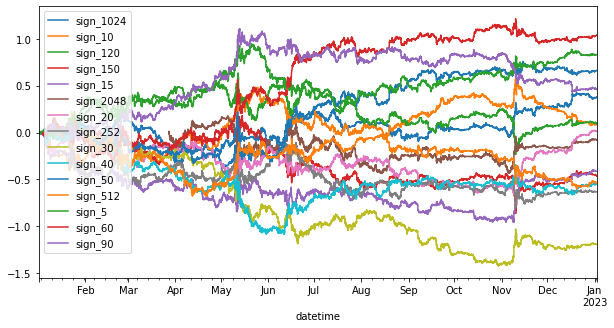

In [8]:
single_factor_single_asset_signal_graph(signal, retkey_word='sign'
weighting_func=np.sign
# weighting_func=lambda x:x * np.exp(-x * x / 4) / 0.89
nv=data_all[[x for x in data_all.columns if key_word in x]]
nv.index=pd.to_datetime(nv.index)
nv.plot()
indicator_df=pd.DataFrame()
for i in range(len(nv.columns)):
    
    indicator_df.loc[i,'param']=int(nv.columns[i][len(key_word)+1:])
    indicator_df.loc[i,'ret']=nv.iloc[:,i].diff().mean()*num_of_trade
    indicator_df.loc[i,'ir']=nv.iloc[:,i].diff().mean()/nv.iloc[:,i].diff().std()*np.sqrt(num_of_trade)
    indicator_df.loc[i,'mdd']=(nv.iloc[:,i]-nv.iloc[:,i].cummax()).min()
    signal_location=f"{file_path}close_reg_signal\\ts_mom_roll_{nv.columns[i][len(key_word)+1:]}.csv"
    signal=pd.read_csv(signal_location,index_col=0)
    signal=signal.applymap(weighting_func)
    turnover=signal.diff().abs().mean(axis=1).mean()
    indicator_df.loc[i,'turnover']=turnover
    
indicator_df.sort_values('param').reset_index(drop=True)

In [ ]:
(nv['sign_60']-nv['sign_30']).plot()

In [ ]:
# key_word='tanh'
# weighting_func=np.tanh
# # weighting_func=lambda x:x * np.exp(-x * x / 4) / 0.89
# nv=data_all[[x for x in data_all.columns if key_word in x]]
# nv.index=pd.to_datetime(nv.index)
# nv.plot()
# indicator_df=pd.DataFrame()
# for i in range(len(nv.columns)):
    
#     indicator_df.loc[i,'param']=int(nv.columns[i][len(key_word)+1:])
#     indicator_df.loc[i,'ret']=nv.iloc[:,i].diff().mean()*num_of_trade
#     indicator_df.loc[i,'ir']=nv.iloc[:,i].diff().mean()/nv.iloc[:,i].diff().std()*np.sqrt(num_of_trade)
#     indicator_df.loc[i,'mdd']=(nv.iloc[:,i]-nv.iloc[:,i].cummax()).min()
#     signal_location=f"{file_path}close_reg_signal\\ts_mom_roll_{nv.columns[i][len(key_word)+1:]}.csv"
#     signal=pd.read_csv(signal_location,index_col=0)
#     signal=signal.applymap(weighting_func)
#     turnover=signal.diff().abs().mean(axis=1).mean()
#     indicator_df.loc[i,'turnover']=turnover
    
# indicator_df.sort_values('param').reset_index(drop=True)

In [ ]:
# key_word='phi'
# # weighting_func=np.sign
# weighting_func=lambda x:x * np.exp(-x * x / 4) / 0.89
# nv=data_all[[x for x in data_all.columns if key_word in x]]
# nv.index=pd.to_datetime(nv.index)
# nv.plot()
# indicator_df=pd.DataFrame()
# for i in range(len(nv.columns)):
    
#     indicator_df.loc[i,'param']=int(nv.columns[i][len(key_word)+1:])
#     indicator_df.loc[i,'ret']=nv.iloc[:,i].diff().mean()*num_of_trade
#     indicator_df.loc[i,'ir']=nv.iloc[:,i].diff().mean()/nv.iloc[:,i].diff().std()*np.sqrt(num_of_trade)
#     indicator_df.loc[i,'mdd']=(nv.iloc[:,i]-nv.iloc[:,i].cummax()).min()
#     signal_location=f"{file_path}close_reg_signal\\ts_mom_roll_{nv.columns[i][len(key_word)+1:]}.csv"
#     signal=pd.read_csv(signal_location,index_col=0)
#     signal=signal.applymap(weighting_func)
#     turnover=signal.diff().abs().mean(axis=1).mean()
#     indicator_df.loc[i,'turnover']=turnover
    
# indicator_df.sort_values('param').reset_index(drop=True)

In [9]:
file_path='C:\\Users\\jason.huang\\research\\close_reg\\crypto\\nonlinear\\'
data_all=pd.DataFrame()
for filename in os.listdir(f"{file_path}ret\\"):
    if 'all' in filename:
        data=pd.read_csv(file_path+'ret\\'+filename,index_col=0)
        data=data.iloc[:,:3]
        data.columns=[f"sign_{filename[12:-8]}",f"tanh_{filename[12:-8]}",f"phi_{filename[12:-8]}"]
        data_all=pd.concat([data_all,data],axis=1)

,param,ret,ir,mdd,turnover
0,5.0,-0.995479,-1.430909,-1.295736,0.774650
1,10.0,0.040939,0.057677,-0.902454,0.390056
2,15.0,0.608279,0.870593,-0.726301,0.258719
3,20.0,0.386756,0.566722,-0.669484,0.196504
4,30.0,1.054055,1.507210,-0.338857,0.130501
5,40.0,0.321159,0.455019,-0.708400,0.098590
6,50.0,-0.785362,-1.167717,-1.289418,0.079559
7,60.0,-0.854230,-1.254742,-1.359498,0.065580
8,90.0,-0.200556,-0.299285,-1.089072,0.044783
9,120.0,0.178586,0.250228,-0.703369,0.033034


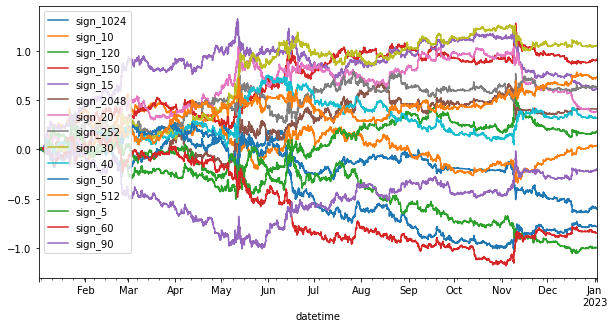

In [10]:
key_word='sign'
weighting_func=np.sign
# weighting_func=lambda x:x * np.exp(-x * x / 4) / 0.89
nv=data_all[[x for x in data_all.columns if key_word in x]]
nv.index=pd.to_datetime(nv.index)
nv.plot()
indicator_df=pd.DataFrame()
for i in range(len(nv.columns)):
    
    indicator_df.loc[i,'param']=int(nv.columns[i][len(key_word)+1:])
    indicator_df.loc[i,'ret']=nv.iloc[:,i].diff().mean()*num_of_trade
    indicator_df.loc[i,'ir']=nv.iloc[:,i].diff().mean()/nv.iloc[:,i].diff().std()*np.sqrt(num_of_trade)
    indicator_df.loc[i,'mdd']=(nv.iloc[:,i]-nv.iloc[:,i].cummax()).min()
    signal_location=f"{file_path}close_reg_signal\\ts_mom_roll_{nv.columns[i][len(key_word)+1:]}.csv"
    signal=pd.read_csv(signal_location,index_col=0)
    signal=signal.applymap(weighting_func)
    turnover=signal.diff().abs().mean(axis=1).mean()
    indicator_df.loc[i,'turnover']=turnover
    
indicator_df.sort_values('param').reset_index(drop=True)

In [29]:
file_path='C:\\Users\\jason.huang\\research\\close_reg\\crypto\\condition_return\\sign\\'
data_all=pd.DataFrame()
for filename in os.listdir(f"{file_path}nv_all\\"):
    data=pd.read_csv(file_path+'nv_all\\'+filename,index_col=0)
    data.columns=[filename[:-4]]
    data_all=pd.concat([data_all,data],axis=1)


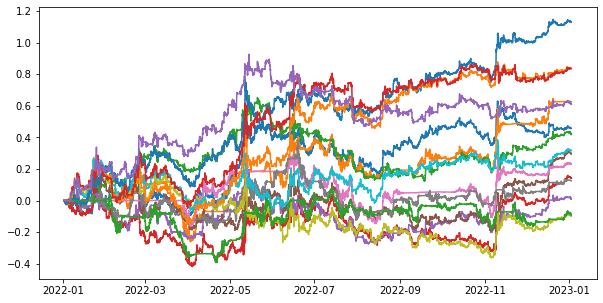

,param,ret,ir,mdd,turnover
0,5.0,1.127036,2.174070,-0.317289,0.333461
1,10.0,0.455303,0.812412,-0.414931,0.166944
2,15.0,0.140448,0.280114,-0.497403,0.110628
3,20.0,0.295217,0.554023,-0.384507,0.083760
4,30.0,-0.098282,-0.195595,-0.633199,0.055504
5,40.0,0.315960,0.658682,-0.351757,0.041655
6,50.0,0.834111,1.714915,-0.382628,0.033959
7,60.0,0.833550,1.620362,-0.345559,0.028208
8,90.0,0.609599,1.251253,-0.454993,0.018923
9,120.0,0.417773,0.898973,-0.541726,0.013984


In [35]:
key_word='linear_negative_nonlinear_positive_ts_mom_roll'
weighting_func=np.sign
# weighting_func=lambda x:x * np.exp(-x * x / 4) / 0.89
nv=data_all[[x for x in data_all.columns if key_word in x]]
nv.index=pd.to_datetime(nv.index)
plt.plot(nv)
plt.show()
indicator_df=pd.DataFrame()
for i in range(len(nv.columns)):
    indicator_df.loc[i,'param']=int(nv.columns[i][len(key_word)+1:])
    indicator_df.loc[i,'ret']=nv.iloc[:,i].diff().mean()*num_of_trade
    indicator_df.loc[i,'ir']=nv.iloc[:,i].diff().mean()/nv.iloc[:,i].diff().std()*np.sqrt(num_of_trade)
    indicator_df.loc[i,'mdd']=(nv.iloc[:,i]-nv.iloc[:,i].cummax()).min()
    signal_location=f"{file_path}signal\\{key_word}_{nv.columns[i][len(key_word)+1:]}.csv"
    signal=pd.read_csv(signal_location,index_col=0)
#     signal=signal.applymap(weighting_func)
    turnover=signal.diff().abs().mean(axis=1).mean()
    indicator_df.loc[i,'turnover']=turnover
    
indicator_df.sort_values('param').reset_index(drop=True)

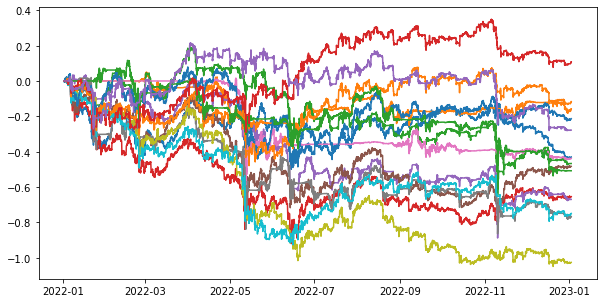

,param,ret,ir,mdd,turnover
0,5.0,-0.213359,-0.386659,-0.568180,0.335778
1,10.0,-0.428890,-0.856363,-0.522142,0.167552
2,15.0,-0.653575,-1.270036,-0.930743,0.111267
3,20.0,-0.482632,-0.987214,-0.748809,0.084155
4,30.0,-1.024578,-2.102222,-1.077272,0.055788
5,40.0,-0.748323,-1.392015,-0.928288,0.041400
6,50.0,-0.117167,-0.239051,-0.492096,0.033378
7,60.0,0.106824,0.224508,-0.316609,0.027838
8,90.0,-0.277780,-0.606693,-0.496665,0.018641
9,120.0,-0.466331,-0.998645,-0.839135,0.013826


In [37]:
key_word='linear_positive_nonlinear_negative_ts_mom_roll'
weighting_func=np.sign
# weighting_func=lambda x:x * np.exp(-x * x / 4) / 0.89
nv=data_all[[x for x in data_all.columns if key_word in x]]
nv.index=pd.to_datetime(nv.index)
plt.plot(nv)
plt.show()
indicator_df=pd.DataFrame()
for i in range(len(nv.columns)):
    indicator_df.loc[i,'param']=int(nv.columns[i][len(key_word)+1:])
    indicator_df.loc[i,'ret']=nv.iloc[:,i].diff().mean()*num_of_trade
    indicator_df.loc[i,'ir']=nv.iloc[:,i].diff().mean()/nv.iloc[:,i].diff().std()*np.sqrt(num_of_trade)
    indicator_df.loc[i,'mdd']=(nv.iloc[:,i]-nv.iloc[:,i].cummax()).min()
    signal_location=f"{file_path}signal\\{key_word}_{nv.columns[i][len(key_word)+1:]}.csv"
    signal=pd.read_csv(signal_location,index_col=0)
#     signal=signal.applymap(weighting_func)
    turnover=signal.diff().abs().mean(axis=1).mean()
    indicator_df.loc[i,'turnover']=turnover
    
indicator_df.sort_values('param').reset_index(drop=True)

In [38]:
b=nv[key_word+'_30']

<AxesSubplot:xlabel='datetime'>

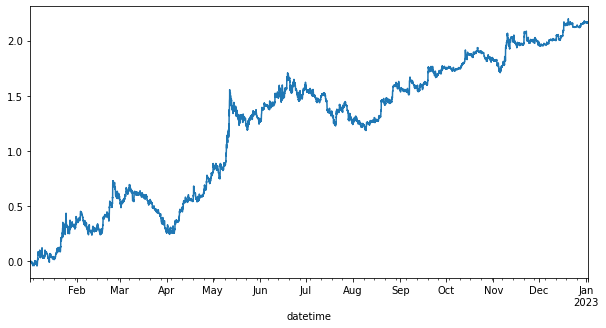

In [39]:
(a-b).plot()